# Movie Data eda

- What is the problem you are seeking to answer?
 - What is the problem you are seeking to answer?
 - Business insights: This can help movie companies optimize their budgets to maximize profits while ensuring audience satisfaction.
  - Stakeholder: Movie companies seeking to maximize profit
- Make a logical case for the possibility of multiple outcomes.
 - Higher budget -> More advertisement -> More viewers -> **More ratings**
  - Higher budget -> No budget allocated to marketing -> **No impact on ratings**
  - Higher budget -> More advertisement and less on quality of movie -> **Lower rating**
  - Lower budget -> Good quality of production -> **Better rating**
- What is the ideal experiment to examine the issue?
 - Regression. Two sample testing
- Present descriptive statistics/visualizations describing
your data and the important relationships.
  - ...

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/DSO 510 group/Project/data')
os.listdir()

['title.ratings.tsv',
 'TMDB_movie_dataset_v11.csv',
 'Movie_data.csv',
 'clean_movie_rating.csv']

In [47]:
df = pd.read_csv('clean_movie_rating.csv').drop('Unnamed: 0', axis=1)
df.head()

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year
0,27205,Inception,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",8.8,2611469,2010.0
1,157336,Interstellar,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",8.7,2193642,2014.0
2,155,The Dark Knight,2008-07-16,1004558444,152,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",9.0,2942753,2008.0
3,19995,Avatar,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",7.9,1408115,2009.0
4,24428,The Avengers,2012-04-25,1518815515,143,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,8.0,1482940,2012.0


In [48]:
df = df[df['runtime'] >= 30]

In [49]:
df.head()

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year
0,27205,Inception,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",8.8,2611469,2010.0
1,157336,Interstellar,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",8.7,2193642,2014.0
2,155,The Dark Knight,2008-07-16,1004558444,152,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",9.0,2942753,2008.0
3,19995,Avatar,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",7.9,1408115,2009.0
4,24428,The Avengers,2012-04-25,1518815515,143,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,8.0,1482940,2012.0


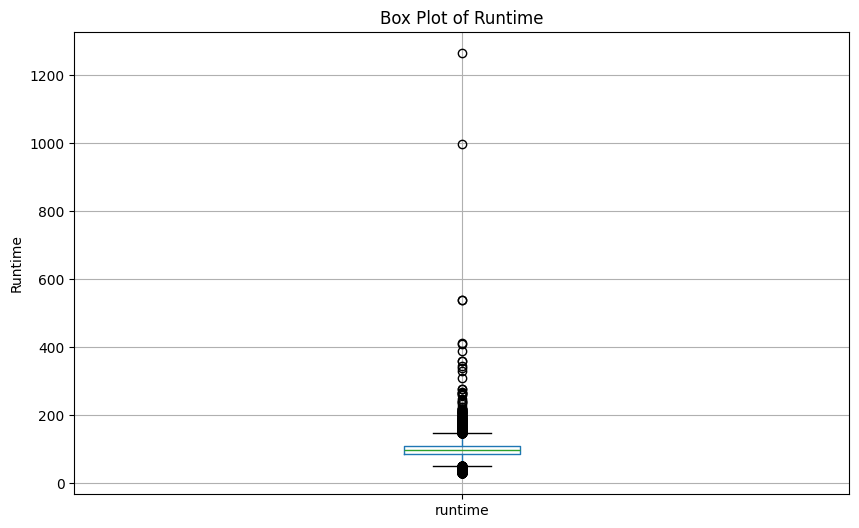

In [50]:
# prompt: box plot runtime

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'runtime' is the column name
plt.figure(figsize=(10, 6))
df.boxplot(column=['runtime'])
plt.title('Box Plot of Runtime')
plt.ylabel('Runtime')
plt.show()


$Avg Rating = \beta_0 + \beta_1Budget + \beta_2\text{Num of ratings} + \epsilon$

## Budget + NumVotes

In [51]:
Y = "averageRating"
features = ['budget', 'numVotes']

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     515.5
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          1.47e-217
Time:                        20:07:52   Log-Likelihood:                -27526.
No. Observations:               15692   AIC:                         5.506e+04
Df Residuals:                   15689   BIC:                         5.508e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8245      0.012    475.697      0.0

In [52]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,1.203041
1,budget,1.566034
2,numVotes,1.566034


In [53]:
unique_genres = set()
for genres_str in df['genres'].dropna():  # Handle potential missing values
    genres = [g.strip() for g in genres_str.split(',')]
    unique_genres.update(genres)
unique_genres_list = list(unique_genres)
unique_genres_list


['Music',
 'Western',
 'Horror',
 'Thriller',
 'Fantasy',
 'Family',
 'Mystery',
 'Crime',
 'Animation',
 'History',
 'TV Movie',
 'Action',
 'Adventure',
 'Documentary',
 'War',
 'Drama',
 'Comedy',
 'Romance',
 'Science Fiction']

In [54]:
genre_groups = {
    "Action & Thrills": ["Action", "Thriller", "Crime", "War", "Western"],
    "Fantasy & Sci-Fi": ["Science Fiction", "Fantasy", "Mystery", "Horror", "Animation"],
    "Drama & Emotional Storytelling": ["Drama", "Romance", "Family", "History", "Music"],
    "Lighthearted & Feel-Good": ["Comedy", "TV Movie", "Family", "Music"],
    "Reality & Non-Fiction": ["Documentary", "History", "War"]
}

In [55]:
for genre_group, genres in genre_groups.items():
    df[genre_group] = df['genres'].str.contains('|'.join(genres), regex=True, na=False).astype(int)

df['years_since_release'] = 2025 - df['year']


In [56]:
df.head()

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year,Action & Thrills,Fantasy & Sci-Fi,Drama & Emotional Storytelling,Lighthearted & Feel-Good,Reality & Non-Fiction,years_since_release
0,27205,Inception,2010-07-15,825532764,148,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",8.8,2611469,2010.0,1,1,0,0,0,15.0
1,157336,Interstellar,2014-11-05,701729206,169,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",8.7,2193642,2014.0,0,1,1,0,0,11.0
2,155,The Dark Knight,2008-07-16,1004558444,152,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",9.0,2942753,2008.0,1,0,1,0,0,17.0
3,19995,Avatar,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",7.9,1408115,2009.0,1,1,0,0,0,16.0
4,24428,The Avengers,2012-04-25,1518815515,143,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,8.0,1482940,2012.0,1,1,0,0,0,13.0


In [58]:
df["Budget × Runtime"] = df["budget"] * df["runtime"]
df["Budget × NumVotes"] = df["budget"] * df["numVotes"]
df["Budget × Years Since Release"] = df["budget"] * df["years_since_release"]


# Descriptive

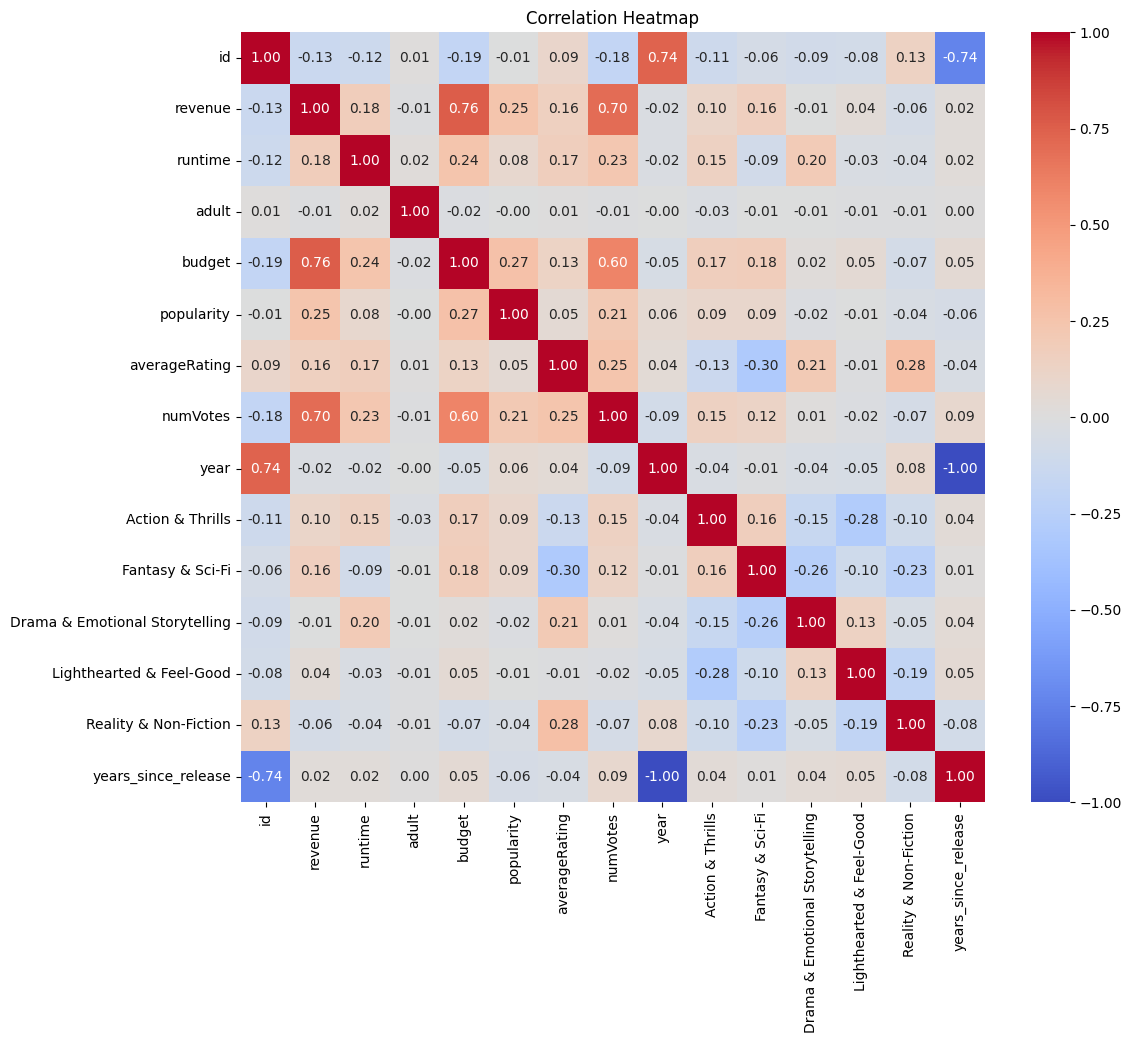

In [15]:
# prompt: heatmap or correlations please

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


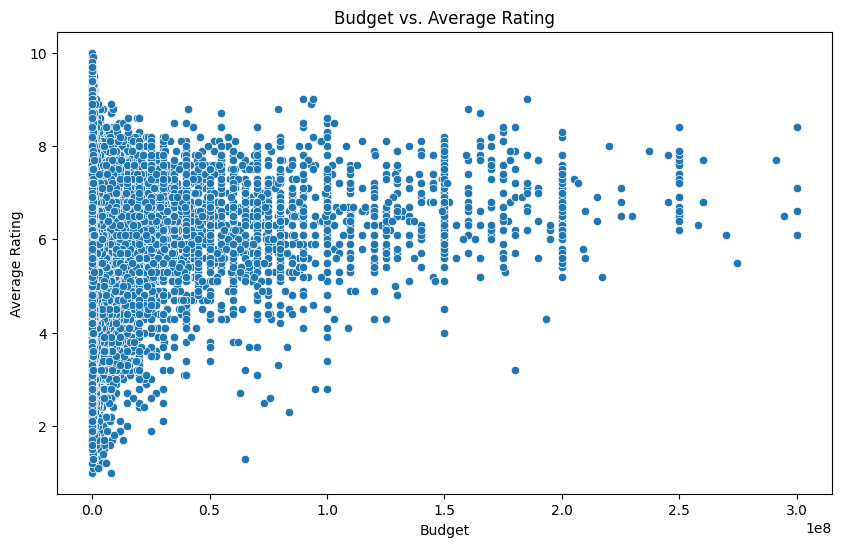

In [16]:
# prompt: budget vs average rating plot please

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you have 'budget' and 'averageRating' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='averageRating', data=df)
plt.title('Budget vs. Average Rating')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.show()


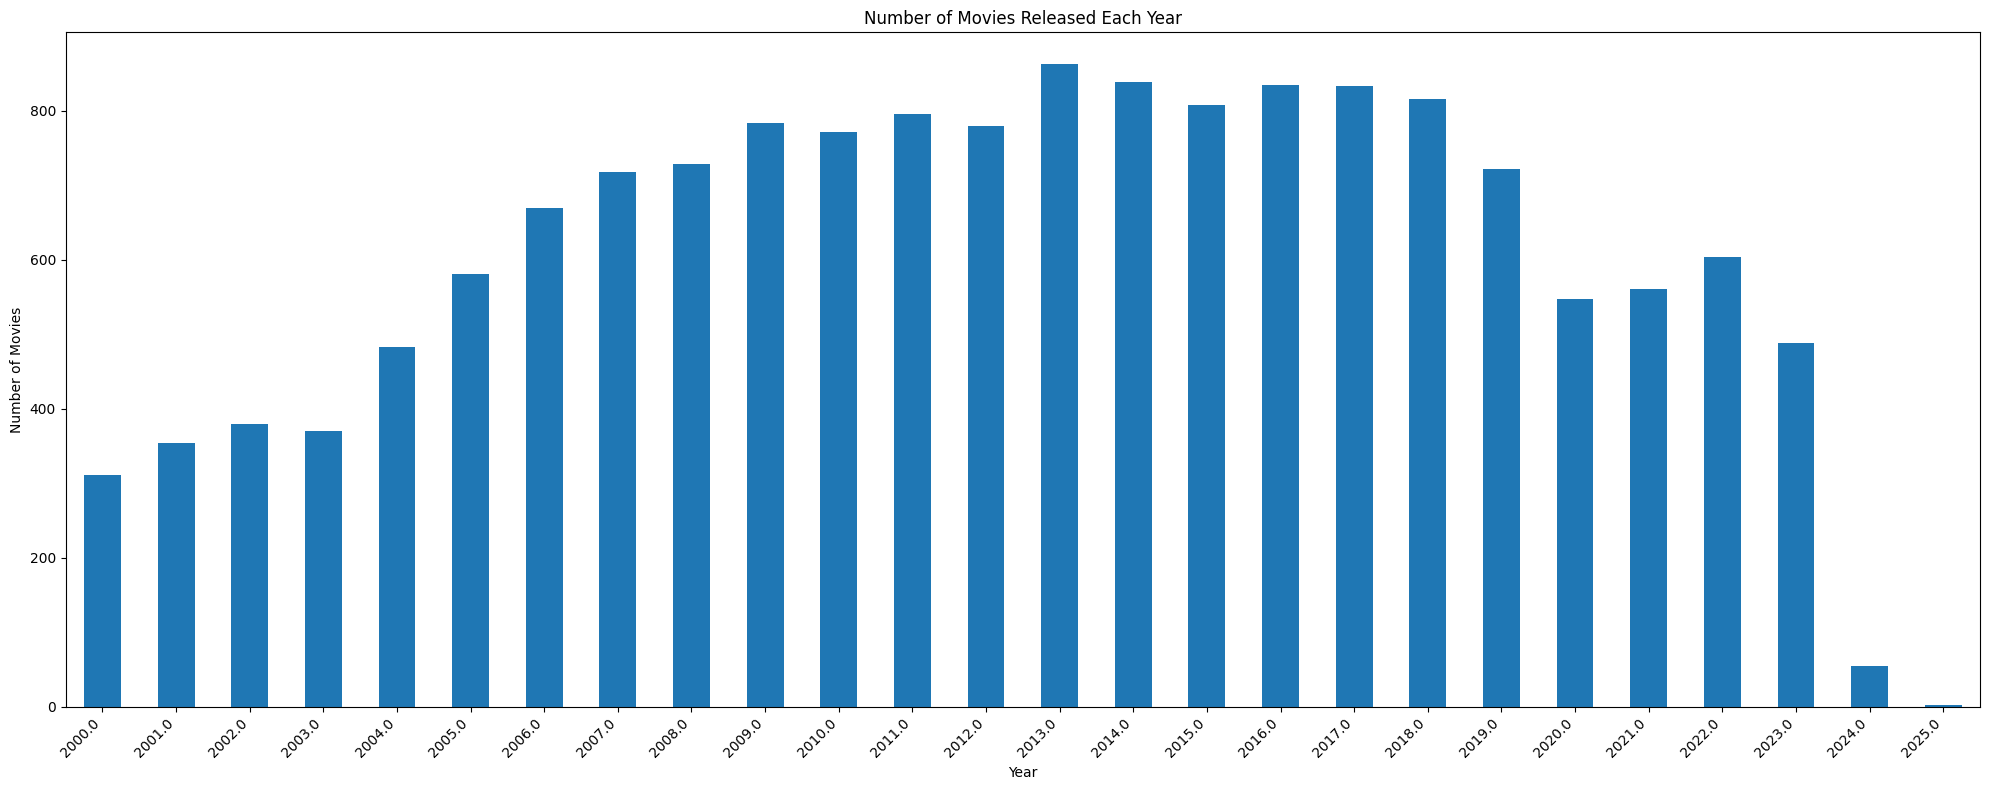

In [17]:
rows_by_year = df.groupby('year').size()

# Create the plot
plt.figure(figsize=(20, 8))
rows_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

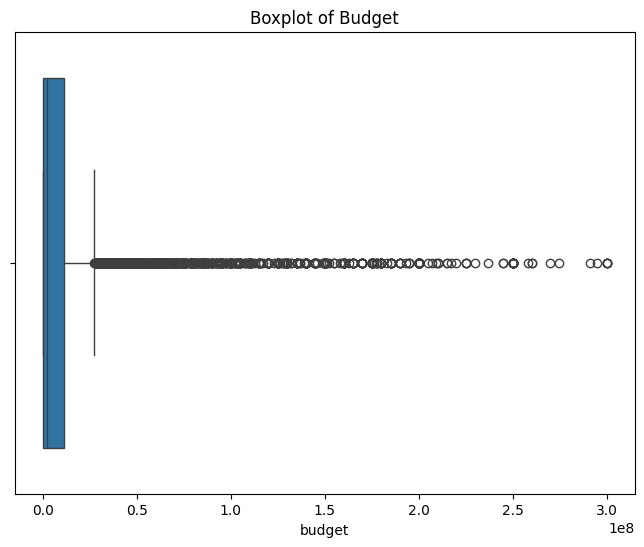

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['budget'])
plt.title('Boxplot of Budget')
plt.show()

In [59]:
# prompt: split df into 3 low mid high, lets do up to 5 mil, to 50, to 300 mill

# Define the thresholds for splitting the DataFrame
low_threshold = 5000000
mid_threshold = 50000000

# Split the DataFrame based on the 'budget' column
df_low = df[df['budget'] <= low_threshold]
df_mid = df[(df['budget'] > low_threshold) & (df['budget'] <= mid_threshold)]
df_high = df[df['budget'] > mid_threshold]

# Print the shapes of the resulting DataFrames
print("Low Budget DataFrame shape:", df_low.shape)
print("Mid Budget DataFrame shape:", df_mid.shape)
print("High Budget DataFrame shape:", df_high.shape)


Low Budget DataFrame shape: (10134, 27)
Mid Budget DataFrame shape: (4416, 27)
High Budget DataFrame shape: (1142, 27)


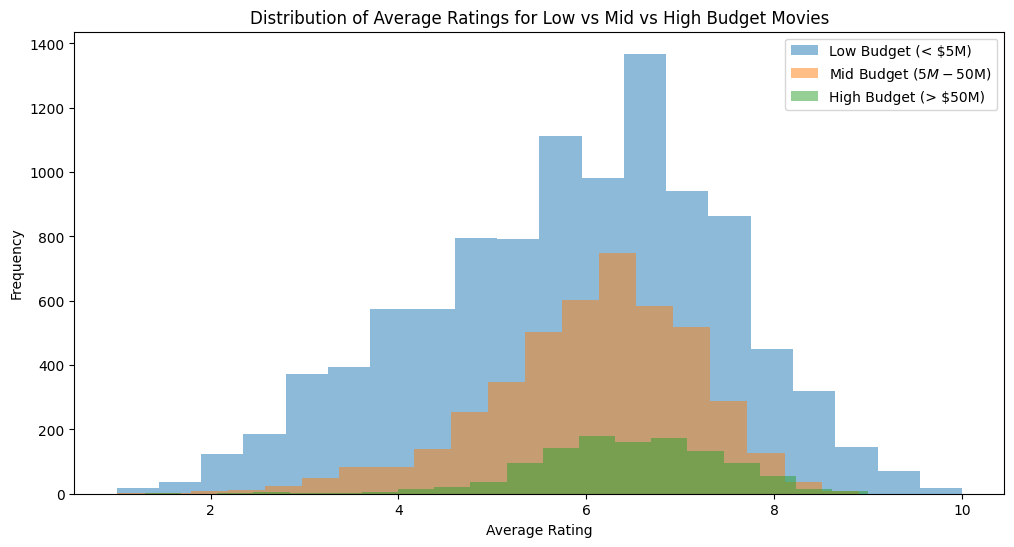

In [20]:
plt.figure(figsize=(12, 6))

plt.hist(df_low['averageRating'], bins=20, alpha=0.5, label='Low Budget (< $5M)')
plt.hist(df_mid['averageRating'], bins=20, alpha=0.5, label='Mid Budget ($5M - $50M)')
plt.hist(df_high['averageRating'], bins=20, alpha=0.5, label='High Budget (> $50M)')

plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings for Low vs Mid vs High Budget Movies')
plt.legend()
plt.show()

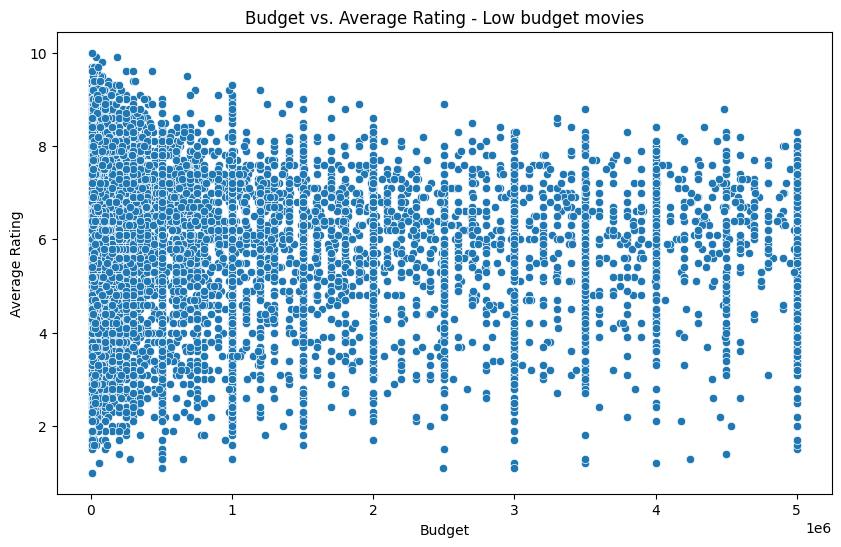

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='averageRating', data=df_low)
plt.title('Budget vs. Average Rating - Low budget movies')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.show()

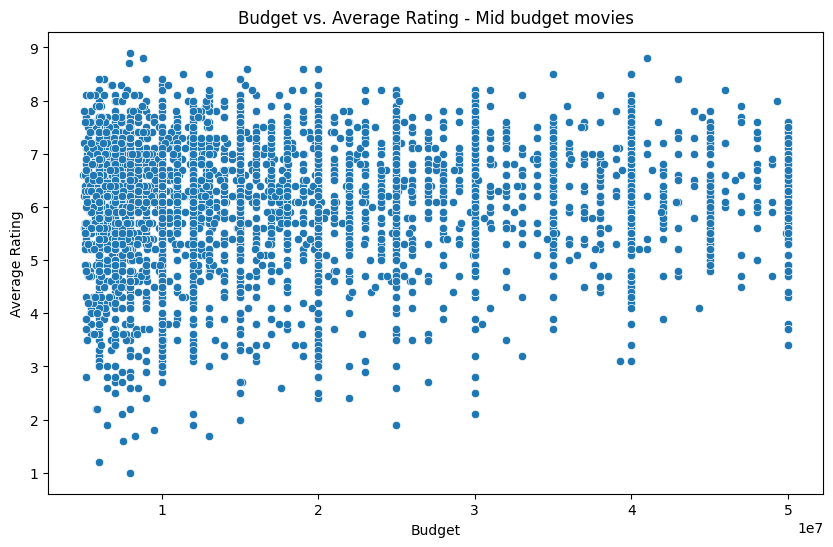

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='averageRating', data=df_mid)
plt.title('Budget vs. Average Rating - Mid budget movies')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.show()

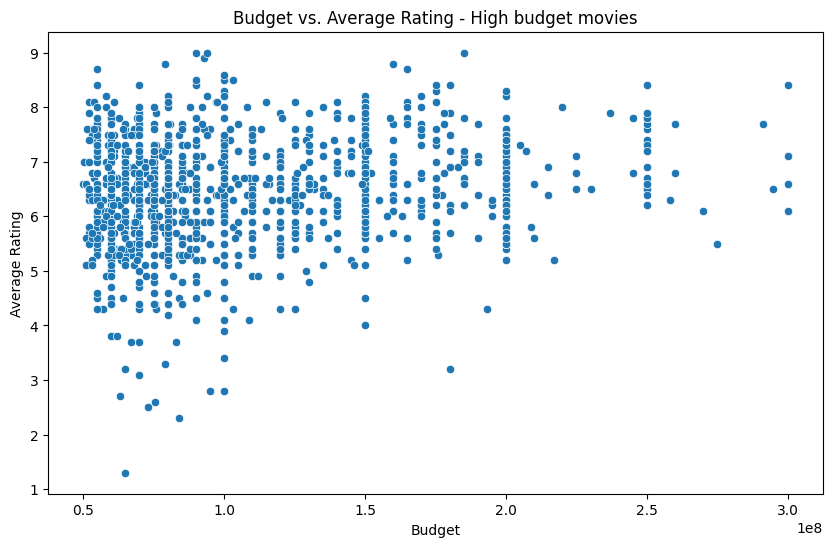

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='averageRating', data=df_high)
plt.title('Budget vs. Average Rating - High budget movies')
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.show()

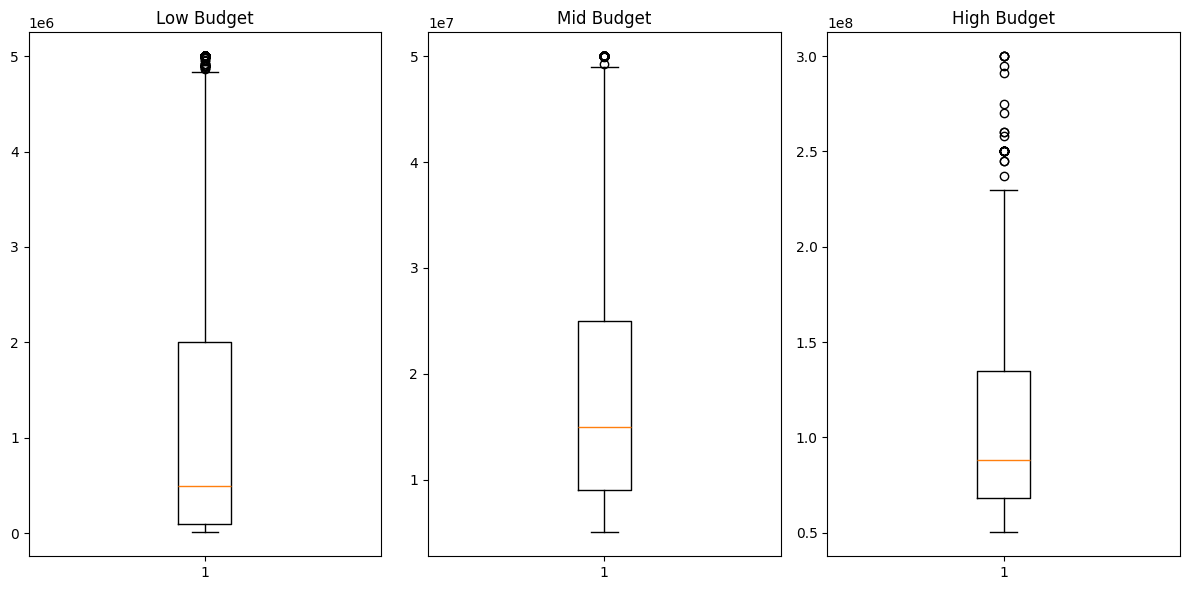

In [24]:
# prompt: could you run box plot of budget for eachof  the 3 dfs

import matplotlib.pyplot as plt

# Assuming df_low, df_mid, and df_high are defined as in the previous code

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df_low['budget'])
plt.title('Low Budget')

plt.subplot(1, 3, 2)
plt.boxplot(df_mid['budget'])
plt.title('Mid Budget')

plt.subplot(1, 3, 3)
plt.boxplot(df_high['budget'])
plt.title('High Budget')

plt.tight_layout()
plt.show()


In [46]:
df

,id,title,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,averageRating,numVotes,year,Action & Thrills,Fantasy & Sci-Fi,Drama & Emotional Storytelling,Lighthearted & Feel-Good,Reality & Non-Fiction,years_since_release,log_budget
0,27205,Inception,2010-07-15,825532764,148,0,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",8.8,2611469,2010.0,1,1,0,0,0,15.0,18.890684
1,157336,Interstellar,2014-11-05,701729206,169,0,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",8.7,2193642,2014.0,0,1,1,0,0,11.0,18.921456
2,155,The Dark Knight,2008-07-16,1004558444,152,0,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",9.0,2942753,2008.0,1,0,1,0,0,17.0,19.035866
3,19995,Avatar,2009-12-15,2923706026,162,0,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",7.9,1408115,2009.0,1,1,0,0,0,16.0,19.283571
4,24428,The Avengers,2012-04-25,1518815515,143,0,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,8.0,1482940,2012.0,1,1,0,0,0,13.0,19.209138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17547,751708,"Apatía, Una Película De Carretera",2012-01-08,0,93,0,250000,tt2078532,es,"Apatía, Una Película De Carretera",Holy Week starts with two friends parting in t...,0.600,Adventure,Ojo De Huracán Productores,Colombia,7.2,56,2012.0,0,0,0,0,0,13.0,12.429216
17551,752171,Baptism,2019-12-26,0,85,0,980000,tt11541780,mo,Botez,Maria is the prototype of the woman from Moldo...,0.600,NaN,NaN,NaN,7.7,43,2019.0,0,0,0,0,0,6.0,13.795308
17553,752936,800,2023-10-06,0,122,0,4209285,tt27539086,ta,800,"The legendary cricketer Muttiah Muralitharan, ...",7.312,Drama,Movie Train Motion Pictures,India,7.1,4278,2023.0,0,0,1,0,0,2.0,15.252803
17557,752278,The Only Way,2004-05-21,0,84,0,25000,tt1366257,en,The Only Way,Devon Browning is viewed as an outcast and is ...,0.600,"Crime, Drama",NaN,United States of America,6.4,48,2004.0,1,0,1,0,0,21.0,10.126631


In [60]:
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())

X = df_low[features]
X = sm.add_constant(X)

model = sm.OLS(df_low[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     432.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:09:34   Log-Likelihood:                -17417.
No. Observations:               10134   AIC:                         3.485e+04
Df Residuals:                   10124   BIC:                         3.493e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [61]:
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())

X = df_mid[features]
X = sm.add_constant(X)

model = sm.OLS(df_mid[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     248.0
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:09:34   Log-Likelihood:                -5842.2
No. Observations:                4416   AIC:                         1.170e+04
Df Residuals:                    4406   BIC:                         1.177e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [62]:
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())

X = df_high[features]
X = sm.add_constant(X)

model = sm.OLS(df_high[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     99.67
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          7.74e-137
Time:                        20:09:35   Log-Likelihood:                -1281.5
No. Observations:                1142   AIC:                             2583.
Df Residuals:                    1132   BIC:                             2633.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
df["Budget × Runtime"]
df["Budget × NumVotes"]
df["Budget × Years Since Release"]

In [ ]:
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'runtime', 'Budget × Runtime'] + list(genre_groups.keys())

X = df_low[features]
X = sm.add_constant(X)

model = sm.OLS(df_low[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     397.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:11:52   Log-Likelihood:                -17388.
No. Observations:               10134   AIC:                         3.480e+04
Df Residuals:                   10123   BIC:                         3.488e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Budget + NumVotes + Genre

In [28]:
Y = "averageRating"
features = ['budget', 'numVotes'] + list(genre_groups.keys())

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     759.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:40   Log-Likelihood:                -25736.
No. Observations:               15692   AIC:                         5.149e+04
Df Residuals:                   15684   BIC:                         5.155e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [29]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,5.803260
1,budget,1.636849
2,numVotes,1.575980
3,Action & Thrills,1.177460
4,Fantasy & Sci-Fi,1.204675
5,Drama & Emotional Storytelling,1.110207
6,Lighthearted & Feel-Good,1.182409
7,Reality & Non-Fiction,1.145111


## Budget + **NumVotes** + Genre + adult

In [30]:
df['adult'] = df['adult'].astype(int)

In [31]:
Y = "averageRating"
features = ['budget', 'numVotes'] + list(genre_groups.keys()) + ['adult']

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     664.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:40   Log-Likelihood:                -25735.
No. Observations:               15692   AIC:                         5.149e+04
Df Residuals:                   15683   BIC:                         5.156e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [32]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,5.818388
1,budget,1.636931
2,numVotes,1.576004
3,Action & Thrills,1.178540
4,Fantasy & Sci-Fi,1.204781
5,Drama & Emotional Storytelling,1.110374
6,Lighthearted & Feel-Good,1.182865
7,Reality & Non-Fiction,1.145745
8,adult,1.001803


## Budget + NumVotes + Genre + runtime

In [33]:
Y = "averageRating"
features = ['budget', 'numVotes'] + list(genre_groups.keys()) + ['runtime']

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     683.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:41   Log-Likelihood:                -25680.
No. Observations:               15692   AIC:                         5.138e+04
Df Residuals:                   15683   BIC:                         5.145e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [34]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,18.824591
1,budget,1.668375
2,numVotes,1.593291
3,Action & Thrills,1.198057
4,Fantasy & Sci-Fi,1.222063
5,Drama & Emotional Storytelling,1.150584
6,Lighthearted & Feel-Good,1.184841
7,Reality & Non-Fiction,1.146718
8,runtime,1.161118


## Budget + NumVotes + Genre + years since release



In [35]:
df['years_since_release'] = 2025 - df['year']

Y = "averageRating"
features = ['budget', 'numVotes'] + list(genre_groups.keys()) + ['years_since_release']

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     672.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:41   Log-Likelihood:                -25711.
No. Observations:               15692   AIC:                         5.144e+04
Df Residuals:                   15683   BIC:                         5.151e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [36]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,9.660746
1,budget,1.637025
2,numVotes,1.583202
3,Action & Thrills,1.179096
4,Fantasy & Sci-Fi,1.204684
5,Drama & Emotional Storytelling,1.111643
6,Lighthearted & Feel-Good,1.184520
7,Reality & Non-Fiction,1.148932
8,years_since_release,1.016954


## Budget + NumVotes + Genre + adult + runtime +  years since release

In [37]:
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'adult'] + list(genre_groups.keys())

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     598.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:41   Log-Likelihood:                -25710.
No. Observations:               15692   AIC:                         5.144e+04
Df Residuals:                   15682   BIC:                         5.152e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [38]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,const,9.673514
1,budget,1.637106
2,numVotes,1.583231
3,years_since_release,1.016980
4,adult,1.001829
5,Action & Thrills,1.180190
6,Fantasy & Sci-Fi,1.204789
7,Drama & Emotional Storytelling,1.111816
8,Lighthearted & Feel-Good,1.184987
9,Reality & Non-Fiction,1.149550


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)  # Select top 5 features

X = df[features]
y = df[Y]

rfe.fit(X, y)

print(X.columns[rfe.support_])

Index(['adult', 'Action & Thrills', 'Fantasy & Sci-Fi',
       'Drama & Emotional Storytelling', 'Reality & Non-Fiction'],
      dtype='object')


In [40]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X, y)

print(pd.Series(lasso.coef_, index=X.columns))

budget                            5.552141e-09
numVotes                          0.000000e+00
years_since_release              -0.000000e+00
adult                             0.000000e+00
Action & Thrills                 -0.000000e+00
Fantasy & Sci-Fi                 -0.000000e+00
Drama & Emotional Storytelling    0.000000e+00
Lighthearted & Feel-Good         -0.000000e+00
Reality & Non-Fiction             0.000000e+00
dtype: float64


In [41]:
import numpy as np

In [42]:
# df['log_budget'] = np.log(df['budget'])
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     614.6
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:42   Log-Likelihood:                -25655.
No. Observations:               15692   AIC:                         5.133e+04
Df Residuals:                   15682   BIC:                         5.141e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [43]:
df['log_budget'] = np.log(df['budget'])
Y = "averageRating"
features = ['log_budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     616.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:06:42   Log-Likelihood:                -25650.
No. Observations:               15692   AIC:                         5.132e+04
Df Residuals:                   15682   BIC:                         5.140e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

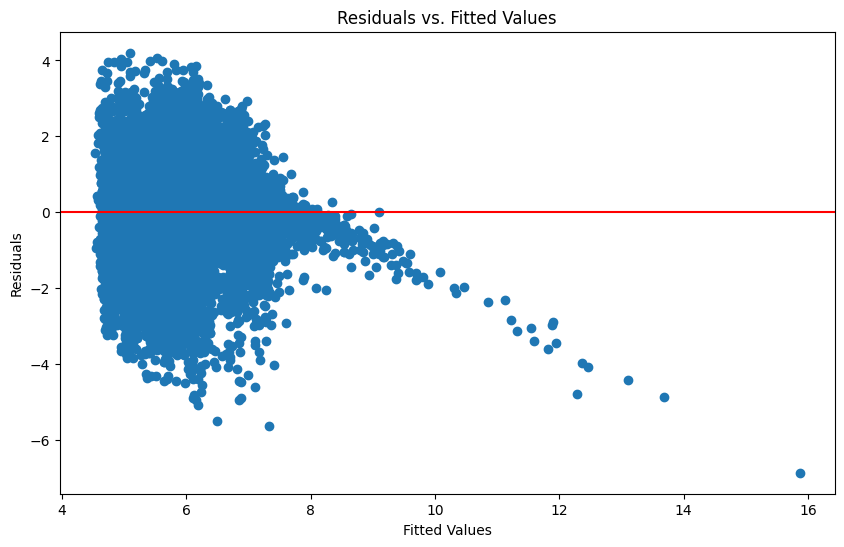

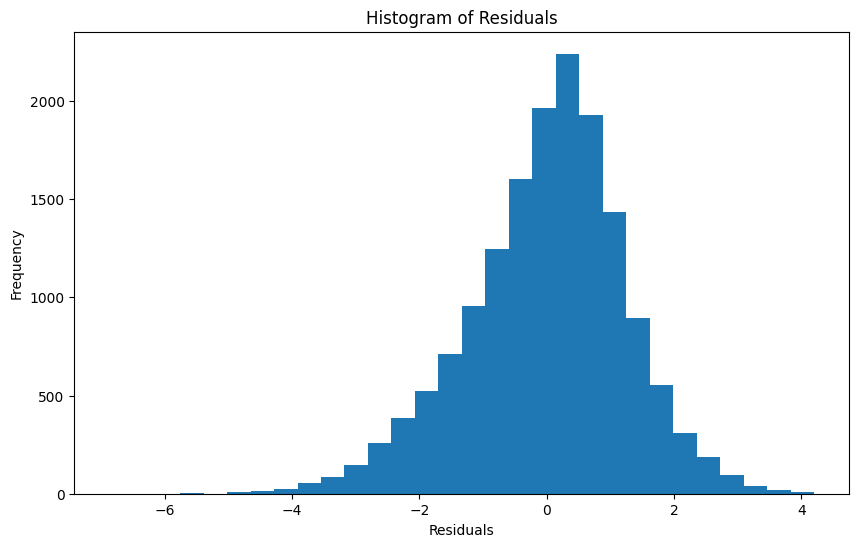

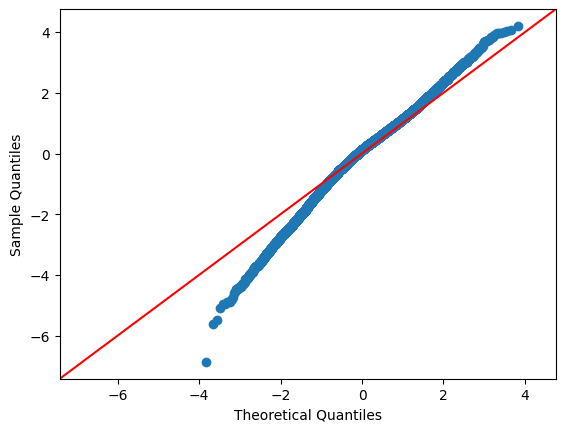

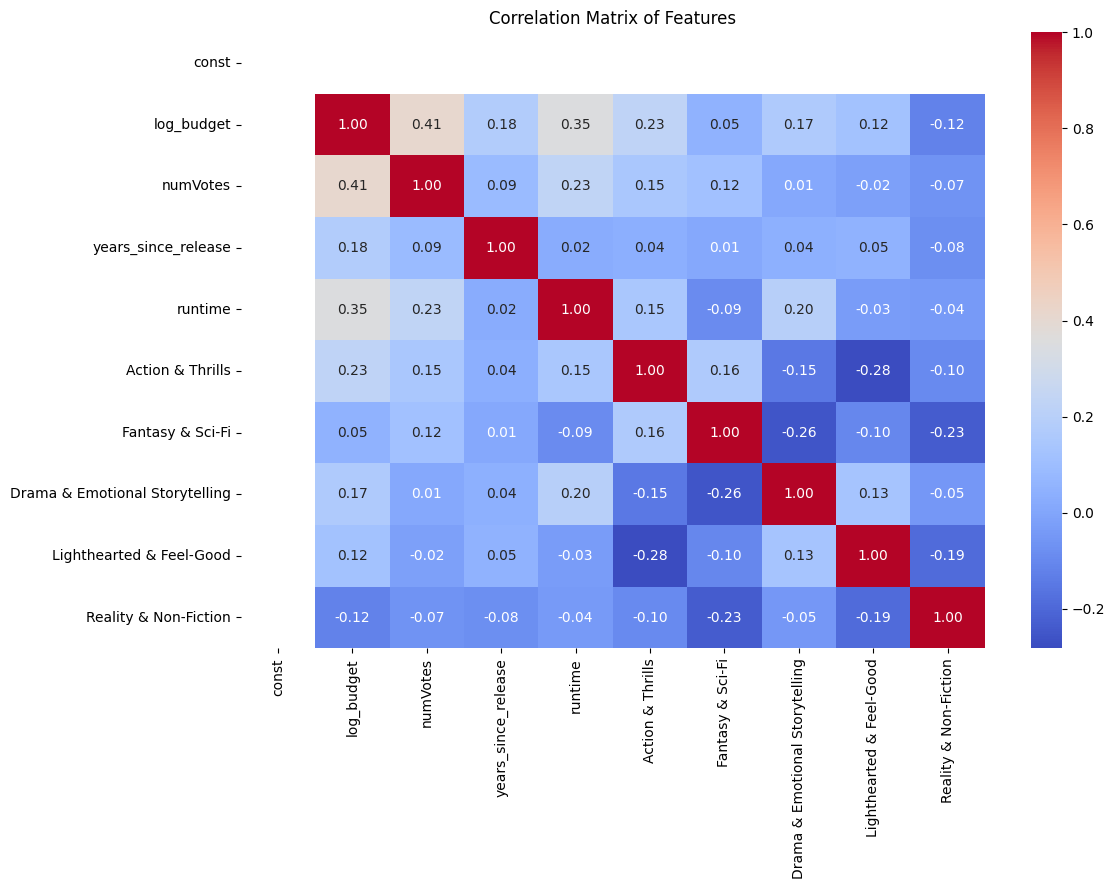

In [44]:
# prompt: how can we visualize the model above

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your fitted statsmodels OLS model
# and 'X' contains your predictor variables

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()

# Plot a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(model.resid, bins=30)  # Adjust the number of bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

#QQ plot
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line='45')
plt.show()

# Create a heatmap of the correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


In [45]:
high_budget_df.budget.describe()

NameError: name 'high_budget_df' is not defined

In [ ]:
# prompt: create 3 different df, low med and high budget groups and run
# Y = "averageRating"
# features = ['budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())
# X = df[features]
# X = sm.add_constant(X)
# model = sm.OLS(df[Y], X).fit()
# print(model.summary())
# on each

# Create budget groups
low_budget_df = df[df['budget'] <= df['budget'].quantile(0.33)]
med_budget_df = df[(df['budget'] > df['budget'].quantile(0.33)) & (df['budget'] <= df['budget'].quantile(0.66))]
high_budget_df = df[df['budget'] > df['budget'].quantile(0.66)]

# Function to run the model
def run_regression(df, Y, features):
  X = df[features]
  X = sm.add_constant(X)
  model = sm.OLS(df[Y], X).fit()
  print(model.summary())

# Define features and target variable
Y = "averageRating"
features = ['budget', 'numVotes', 'years_since_release', 'runtime'] + list(genre_groups.keys())

# Run regressions for each budget group
print("Low Budget Group:")
run_regression(low_budget_df, Y, features)

print("\nMedium Budget Group:")
run_regression(med_budget_df, Y, features)

print("\nHigh Budget Group:")
run_regression(high_budget_df, Y, features)


In [ ]:
df.budget.sort_values(ascending=False)

## T-Test

In [ ]:
low = df[df['budget'] < 500].averageRating
high = df[df['budget'] >= 500].averageRating

#T test on rating
from scipy import stats
stats.ttest_ind(low, high)

In [ ]:
# prompt: visualize low group and high groups averageRating

import matplotlib.pyplot as plt

# Assuming 'low' and 'high' are defined as in the provided code
low = df[df['budget'] < 500].averageRating
high = df[df['budget'] >= 500].averageRating

# Calculate the means
low_mean = low.mean()
high_mean = high.mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Low Budget', 'High Budget'], [low_mean, high_mean], color=['skyblue', 'coral'])
plt.ylabel('Average Rating')
plt.title('Average Rating for Low vs. High Budget Movies')
plt.ylim(0, 10) # Adjust y-axis limit if needed
plt.show()


In [ ]:
df.numVotes

In [ ]:
Y = "averageRating"
features = ['budget']

X = df[features]
X = sm.add_constant(X)

model = sm.OLS(df[Y], X).fit()
print(model.summary())

In [ ]:
# prompt: generate budget vs average rating and the model fit line from above

# Assuming 'model' is your fitted statsmodels OLS model from the previous code
# and 'X' contains your predictor variables, specifically 'budget'.

# Get the model's parameters
intercept = model.params['const']
slope = model.params['budget']

# Generate points for the regression line
x_values = np.linspace(X['budget'].min(), X['budget'].max(), 100)  # 100 evenly spaced points
y_values = intercept + slope * x_values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['averageRating'], label="Actual Data")
plt.plot(x_values, y_values, color='red', label="Model Fit Line")

plt.xlabel("Budget")
plt.ylabel("Average Rating")
plt.title("Budget vs. Average Rating with Model Fit Line")
plt.legend()
plt.show()
